# Answer Image Generation

Below we will demonstrate how to build an open-domain QA pipeline using the unique components from fastRAG. 

We will use a `TfidfRetriever` retriever, a `Fusion-in-Decoder` model to generate answers given the retrieved evidence, and an answer diffusion generator `ImageDiffuserGenerator`, that will generate an image from the answer dynamically.

## Create Document Store

First, we have a list of 20 passages about former president Barack Obama, fetched from a Wikipedia Elastic Index. 

In [2]:
from haystack.document_stores import InMemoryDocumentStore

In [4]:
passages = [
   {
      "title":"Barack Obama (disambiguation)",
      "text":"Barack Obama (disambiguation) Barack Obama (born 1964) is an American attorney and politician who served as the 44th President of the United States from 2009 to 2017.  Barack Obama may also refer to :"
   },
   {
      "title":"Barack Obama",
      "text":"Barack Obama Barack Hussein Obama II (; born August 4, 1961) is an American attorney and politician who served as the 44th president of the United States from 2009 to 2017. A member of the Democratic Party, he was the first African American to be elected to the presidency. He previously served as a U.S. senator from Illinois from 2005 to 2008 and an Illinois state senator from 1997 to 2004. Obama was born in Honolulu, Hawaii. After graduating from Columbia University in 1983, he worked as a community organizer in Chicago. In 1988, he enrolled in Harvard Law School,"
   },
   {
      "title":"Barack Obama Sr.",
      "text":"Barack Obama Sr. Barack Hussein Obama Sr. (; 18 June 1936 – 24 November 1982) was a Kenyan senior governmental economist and the father of Barack Obama, the 44th President of the United States. He is a central figure of his son\\'s memoir, \"Dreams from My Father\" (1995). Obama married in 1954 and had two children with his first wife, Kezia. He was selected for a special program to attend college in the United States and studied at the University of Hawaii. There, Obama met Stanley Ann Dunham, whom he married in 1961, and with whom he had a son,"
   },
   {
      "title":"Barack Obama in comics",
      "text":"the face. Barack Obama is the subject of graphic novel \"Barack Hussein Obama\" by Steven Weissman. In this, President Obama and his cast of characters (Secretary Clinton, VP Joe Biden, his family) experience life in a parallel universe. Barack Obama has also appeared in Archie Comics Veronica #199, and Archie #616 and #617. President Obama was in the Flashpoint Storyline of DC comics of 2011. He discusses the earth members of The Green Lantern Corp with Amanda Waller."
   },
   {
      "title":"Family of Barack Obama",
      "text":"Family of Barack Obama The family of Barack Obama, the 44th President of the United States, and his wife Michelle Obama is made up of people of Kenyan (Luo), African-American, and Old Stock American (including originally English, Scots-Irish, Welsh, German, and Swiss) ancestry. Their immediate family was the First Family of the United States from 2009 to 2017. The Obamas are the first First Family of African-American descent. Michelle LaVaughn Robinson Obama (born January 17, 1964) is an American lawyer, university administrator, and writer who served as the First Lady of the United States from 2009 to 2017. She is"
   },
   {
      "title":"Bibliography of Barack Obama",
      "text":"Bibliography of Barack Obama This bibliography of Barack Obama is a list of written and published works, both books and films, about Barack Obama, 44th President of the United States."
   },
   {
      "title":"President Barack Obama (painting)",
      "text":"President Barack Obama (painting) President Barack Obama is a 2018 portrait of Barack Obama by the artist Kehinde Wiley for the National Portrait Gallery. In October 2017, it was announced that Wiley had been chosen by Barack Obama to paint an official portrait of the former president to appear in Smithsonian\\'s National Portrait Gallery \"America\\'s Presidents\" exhibition. The painting depicts Obama sitting in a chair seemingly floating among foliage. The foliage is described by the author as \"chrysanthemums (the official flower of Chicago), jasmine (symbolic of Hawaii where the president spent most of his childhood) and African blue lilies (alluding"
   },
   {
      "title":"Barack Obama presidential campaign",
      "text":"Barack Obama presidential campaign Barack Obama, the 44th President of the United States, has successfully run for president twice: Barack Obama presidential campaign may refer to:"
   },
   {
      "title":"Barack Obama: The Story",
      "text":"Barack Obama: The Story Barack Obama: The Story is a book written by David Maraniss on the life of United States President Barack Obama. The biography was published on June 19, 2012."
   },
   {
      "title":"Barack Obama Day",
      "text":"Barack Obama Day Barack Obama Day refers to two days of recognition in the United States in honor of Barack Obama, who served as the 44th President of the United States from 2009 to 2017. The State of Illinois celebrates the commemorative holiday every August 4, which is Obama's birthday, beginning in 2018. Obama was a member of the Illinois Senate from 1997 to 2004 and represented the state in the United States Senate from 2005 to 2008 before becoming president. Similar to other commemorative holidays, it is not a legal state holiday, meaning workplaces are not closed on the"
   },
   {
      "title":"Barack Obama \"Joker\" poster",
      "text":"Barack Obama &quot;Joker&quot; poster The Barack Obama \"Joker\" poster is a digitally manipulated image of United States President Barack Obama, designed by Firas Alkhateeb in January 2009, that was adopted by some critics of the Obama administration and described as the most famous anti-Obama image. The image portrays Obama as comic book supervillain the Joker, based on the portrayal by Heath Ledger in \"The Dark Knight\" (2008). Alkhateeb has said the image was not intended to make a political statement. He uploaded the image to the photo-sharing website Flickr, from where it was downloaded by an unknown individual who added"
   },
   {
      "title":"Barack Obama in comics",
      "text":"who proclaims that he is endorsing him for president. The issue sold out four print runs. A month later, the comic was followed up by \"Presidential Material: Barack Obama\" by Jeff Mariotte and in November 2008 with \"Obama: The Comic Book\" by Rod Espinosa. In November 2008, two things led to an explosion in popularity of the Obama comic book character. One of Obama\\'s advisers gave an interview to journalist Jon Swaine of \"The Daily Telegraph\" titled, \"Barack Obama: The 50 facts you might not know.\" In the interview, it emerged that Obama collects \"Spider-Man and Conan the Barbarian.\" Then"
   },
   {
      "title":"Family of Barack Obama",
      "text":"Akumu Obama. She is the sole surviving full sibling of Barack Obama Sr. Sarah Onyango Obama was the third wife of Obama's paternal grandfather. She is known for short as Sarah Obama; she is sometimes referred to as Sarah Ogwel, Sarah Hussein Obama, or Sarah Anyango Obama. She lives in Nyang'oma Kogelo village, 30 miles west of western Kenya's main town, Kisumu, on the edge of Lake Victoria. (She should not be confused with her stepdaughter of the same name, Sarah Obama, a daughter of Onyango's second wife Akumu.) Although she is not a blood relation, Barack Obama calls her"
   },
   {
      "title":"Barack Obama",
      "text":"11th consecutive year, although Dwight D. Eisenhower was selected most admired in twelve non-consecutive years. Obama was born on August 4, 1961, at Kapiolani Medical Center for Women and Children in Honolulu, Hawaii. He is the only president who was born outside of the contiguous 48 states. He was born to a white mother and a black father. His mother, Ann Dunham (1942–1995), was born in Wichita, Kansas; she was mostly of English descent, with some German, Irish (3.13%), Scottish, Swiss, and Welsh ancestry. His father, Barack Obama Sr. (1936–1982), was a Luo Kenyan from Nyang'oma Kogelo. Obama's parents met"
   },
   {
      "title":"Barack Obama",
      "text":"since Democratic President Jimmy Carter. By contrast, the federal prison population increased significantly under presidents Ronald Reagan, George H. W. Bush, Bill Clinton, and George W. Bush. Obama left office in January 2017 with a 60% approval rating. A 2017 C-SPAN \"Presidential Historians Survey\" ranked Obama as the 12th-best US president. The Barack Obama Presidential Center is Obama\\'s planned presidential library. It will be hosted by the University of Chicago and located in Jackson Park on the South Side of Chicago."
   },
   {
      "title":"Barack Obama Plaza",
      "text":"Barack Obama Plaza Barack Obama Plaza (Moneygall services), is an off line service area, at Junction 23 of the M7 on the outskirts of the village of Moneygall in Counties Tipperary, Ireland. The plaza was opened for business in June 2014 and is accessed using the existing junction 23 slip roads. It is named after US president Barack Obama, whose 3rd great grandfather lived nearby. The ancestor was reportedly Falmouth Kearney, who emigrated to the US in 1850. The service station cost 7 million euros to construct, and opened in 2014. The Plaza is owned and operated by Supermacs Ireland"
   },
   {
      "title":"Barack Obama Academy",
      "text":"Barack Obama Academy Barack Obama Academy is a small alternative middle school in Oakland, California. It is part of the Oakland Unified School District. It became notable as the first middle school in the United States to be officially named or renamed after US President Barack Obama in March 2009. The middle school, which opened in 2007, was formerly known as the Alternative Learning Community. The name change was prompted by the school's students. As of 2011 it had 24 students, most of whom were low income African Americans."
   },
   {
      "title":"Inauguration of Barack Obama",
      "text":"Inauguration of Barack Obama Inauguration of Barack Obama may refer to:"
   },
   {
      "title":"Barack Obama Day",
      "text":"Bill 55, which designated August 4 as Barack Obama Day but did not make it an official state holiday. The bill passed both houses of the Illinois General Assembly with no votes against, and was signed into law by Illinois Governor Bruce Rauner on August 4, 2017. The bill amended the State Commemorative Dates Act to include a new section: Barack Obama Day. August 4th of each year is designated as Barack Obama Day, to be observed throughout the State as a day set apart to honor the 44th President of the United States of America who began his career"
   },
   {
      "title":"Protests against Barack Obama",
      "text":"Protests against Barack Obama Protests against Barack Obama occurred throughout the United States during Barack Obama's 2008 presidential campaign and during Obama's presidency. During the 2008 presidential election, particularly in the lead up to November 4, election day, numerous incidents against Obama were documented."
   }
]

In [5]:
document_store = InMemoryDocumentStore()

In [6]:
from haystack.schema import Document

documents = []
for i, passage in enumerate(passages):
    documents.append(Document(content=passage["text"], meta={"title": passage["title"]}, id=i))

document_store.write_documents(documents)

## Initialize the pipeline components

Initialize the components we are going to use in our pipeline.

In [7]:
from haystack.nodes import TfidfRetriever

In [8]:
retriever = TfidfRetriever(top_k=10, document_store=document_store)

In [11]:

from fastrag.readers import FiDReader

fid_model_path = None  ## change this to the local FID model
assert fid_model_path is not None, "Please change fid_model_path to the path of your trained FiD model"

reader = FiDReader(
    input_converter_tokenizer_max_len= 256,
    model_name_or_path=fid_model_path, 
    num_beams=1, 
    min_length=2, 
    max_length=100, 
    use_gpu=False
)

/store/.local/lib/python3.8/site-packages/transformers/models/t5/tokenization_t5_fast.py:156: FutureWarning: This tokenizer was incorrectly instantiated with a model max length of 512 which will be corrected in Transformers v5.
For now, this behavior is kept to avoid breaking backwards compatibility when padding/encoding with `truncation is True`.
- Be aware that you SHOULD NOT rely on t5-base automatically truncating your input to 512 when padding/encoding.
- If you want to encode/pad to sequences longer than 512 you can either instantiate this tokenizer with `model_max_length` or pass `max_length` when encoding/padding.
- To avoid this warning, please instantiate this tokenizer with `model_max_length` set to your preferred value.
  warnings.warn(


Initialize the ImageDiffuserGenerator:

In [12]:
from fastrag.image_generators.diffusers import ImageDiffuserGenerator

In [13]:
# !pip install diffusers --upgrade

In [14]:
image_generator = ImageDiffuserGenerator(
    access_token="YOUR ACCESS TOKEN HERE",
    batch_size=1,
    use_gpu=True,
    model_name="CompVis/stable-diffusion-v1-4",
    num_inference_steps=15
)

Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.


## Create a pipeline

In [15]:
from haystack import Pipeline

p = Pipeline()

### Add the components in the right order

In [16]:
p.add_node(component=retriever, name="Retriever", inputs=["Query"])
p.add_node(component=reader, name="Reader", inputs=["Retriever"])
p.add_node(component=image_generator, name="Image_gen", inputs=["Reader"])

### Run a query through the pipeline

In [30]:
res = p.run(query="Who is Barack Obama?")

batch len: 1, start_index: 0, end_index: 1, chunk_index: 0, chunks: 2


  0%|          | 0/15 [00:00<?, ?it/s]

images: 1, batch_index_range: [0], merged_texts: 1
		 image_index: 0, merged_text_index: 0


### Display the answer

In [34]:
res['answers'][0].answer

'44th President'

And the resuling generated image is:

In [35]:
image_base_64 = res['images']['answer'][0]['image']

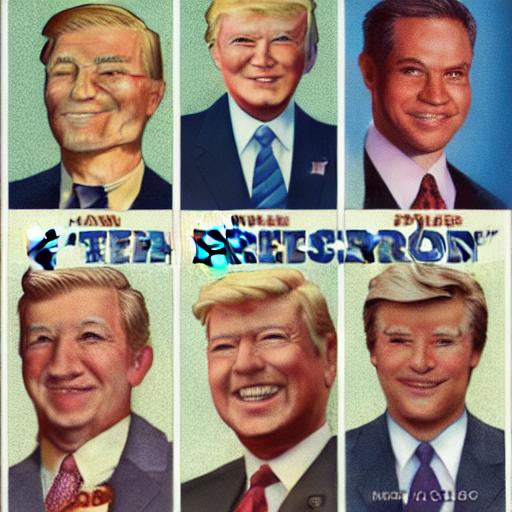

In [36]:
from IPython import display
from base64 import b64decode

display.Image(b64decode(image_base_64))